In [26]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [7]:
df = pd.read_csv("cleaned_apps_reviews.csv", parse_dates=['review_date'])
apps_df = pd.read_csv("data/apps_info.csv")


# Review Score Dağılımı

/var/folders/p_/zd0vcjpx57s19zc87rq2xj680000gn/T/ipykernel_2368/2963789122.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='review_score', data=df, palette='mako')


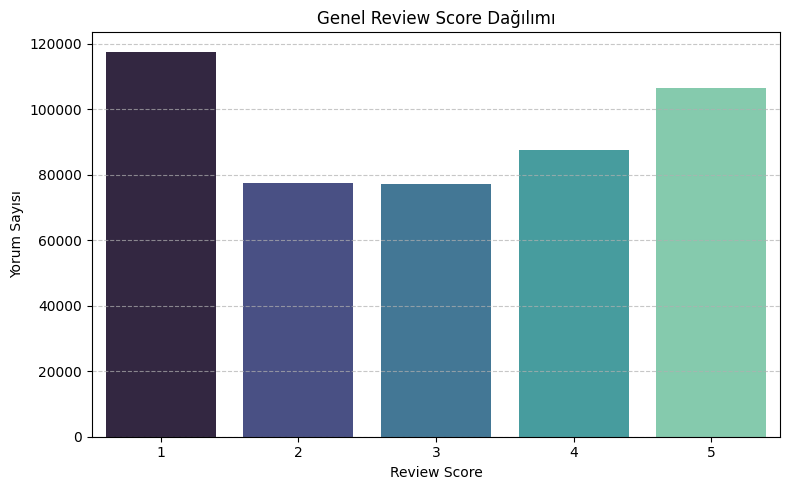

In [4]:
plt.figure(figsize=(8, 5))
sns.countplot(x='review_score', data=df, palette='mako')
plt.title("Genel Review Score Dağılımı")
plt.xlabel("Review Score")
plt.ylabel("Yorum Sayısı")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [5]:
print("Ortalama Review Score:", round(df['review_score'].mean(), 2))

Ortalama Review Score: 2.97


/var/folders/p_/zd0vcjpx57s19zc87rq2xj680000gn/T/ipykernel_2368/2207131333.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=app_scores.index.astype(str), y=app_scores.values, palette='viridis')


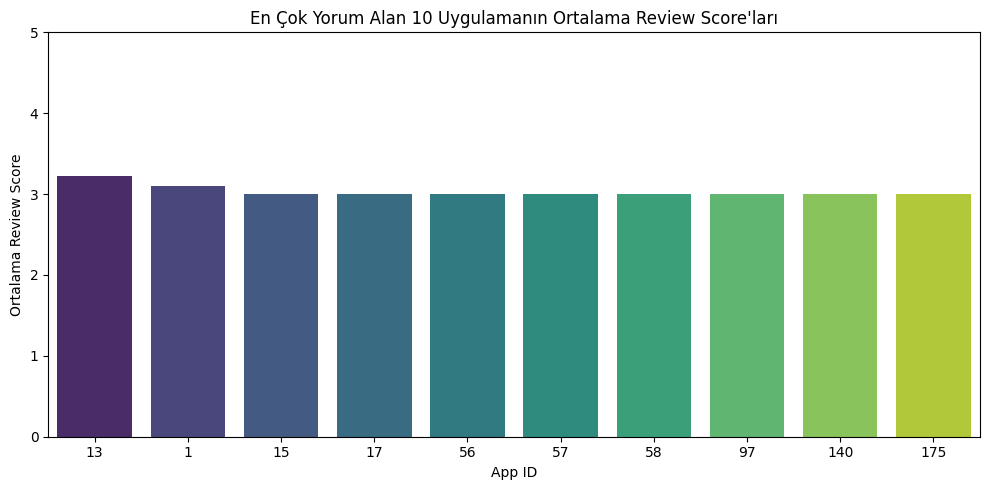

In [6]:
top_apps = df['app_id'].value_counts().head(10).index
top_df = df[df['app_id'].isin(top_apps)]

app_scores = top_df.groupby('app_id')['review_score'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=app_scores.index.astype(str), y=app_scores.values, palette='viridis')
plt.title("En Çok Yorum Alan 10 Uygulamanın Ortalama Review Score'ları")
plt.xlabel("App ID")
plt.ylabel("Ortalama Review Score")
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

In [9]:
merged_df = pd.merge(df, apps_df, on="app_id", how="left")

In [10]:
top_apps = merged_df['app_name'].value_counts().head(10).index
top_df = merged_df[merged_df['app_name'].isin(top_apps)]

In [11]:
app_scores = top_df.groupby('app_name')['review_score'].mean().sort_values(ascending=False)


/var/folders/p_/zd0vcjpx57s19zc87rq2xj680000gn/T/ipykernel_2368/3864162298.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=app_scores.index, y=app_scores.values, palette='magma')


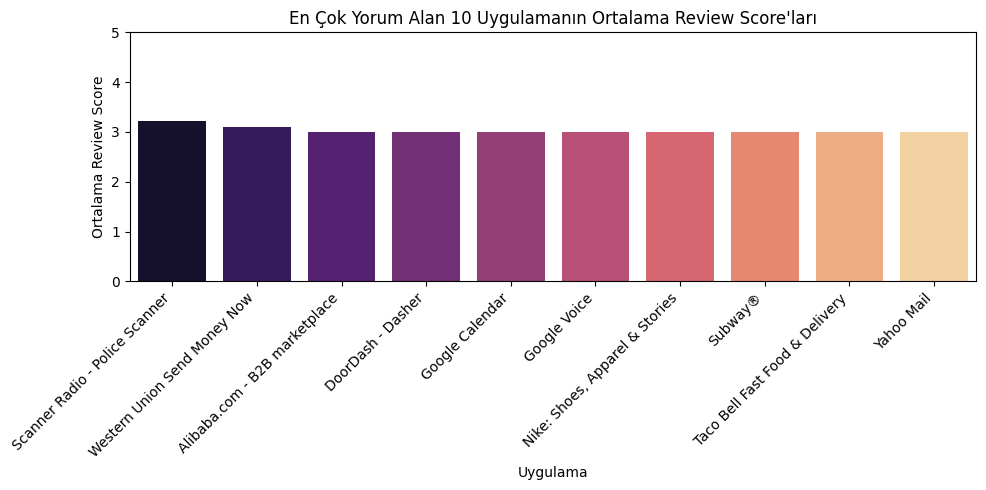

In [12]:
plt.figure(figsize=(10, 5))
sns.barplot(x=app_scores.index, y=app_scores.values, palette='magma')
plt.title("En Çok Yorum Alan 10 Uygulamanın Ortalama Review Score'ları")
plt.xlabel("Uygulama")
plt.ylabel("Ortalama Review Score")
plt.ylim(0, 5)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [14]:
pivot_table = top_df.pivot_table(
    index='app_name',
    columns='review_score',
    values='review_text',  # herhangi bir sütun olabilir
    aggfunc='count',
    fill_value=0
)

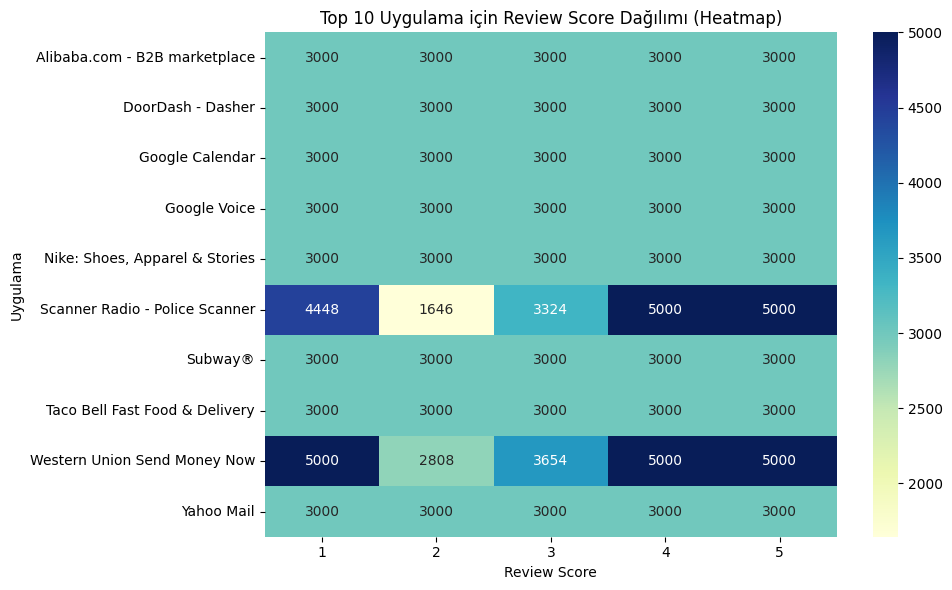

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Top 10 Uygulama için Review Score Dağılımı (Heatmap)")
plt.xlabel("Review Score")
plt.ylabel("Uygulama")
plt.tight_layout()
plt.show()

In [16]:
app_mean_scores = merged_df.groupby('app_name')['review_score'].mean().sort_values(ascending=False)
top_apps = app_mean_scores.head(10)
bottom_apps = app_mean_scores.tail(10)

/var/folders/p_/zd0vcjpx57s19zc87rq2xj680000gn/T/ipykernel_2368/435062536.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_apps.values, y=top_apps.index, palette='crest')


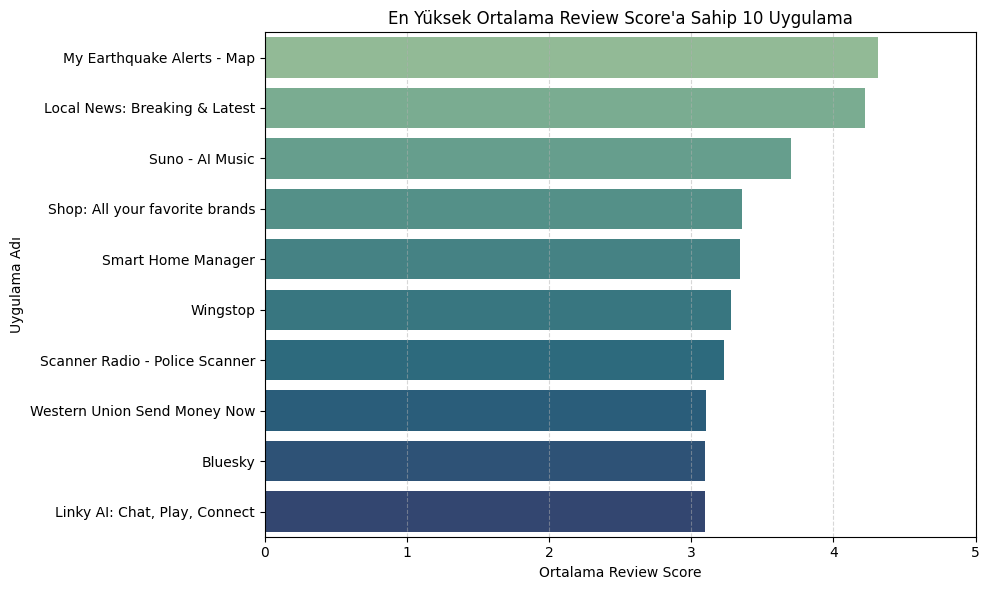

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_apps.values, y=top_apps.index, palette='crest')
plt.title('En Yüksek Ortalama Review Score\'a Sahip 10 Uygulama')
plt.xlabel('Ortalama Review Score')
plt.ylabel('Uygulama Adı')
plt.xlim(0, 5)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


/var/folders/p_/zd0vcjpx57s19zc87rq2xj680000gn/T/ipykernel_2368/633830334.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_apps.values, y=bottom_apps.index, palette='rocket')


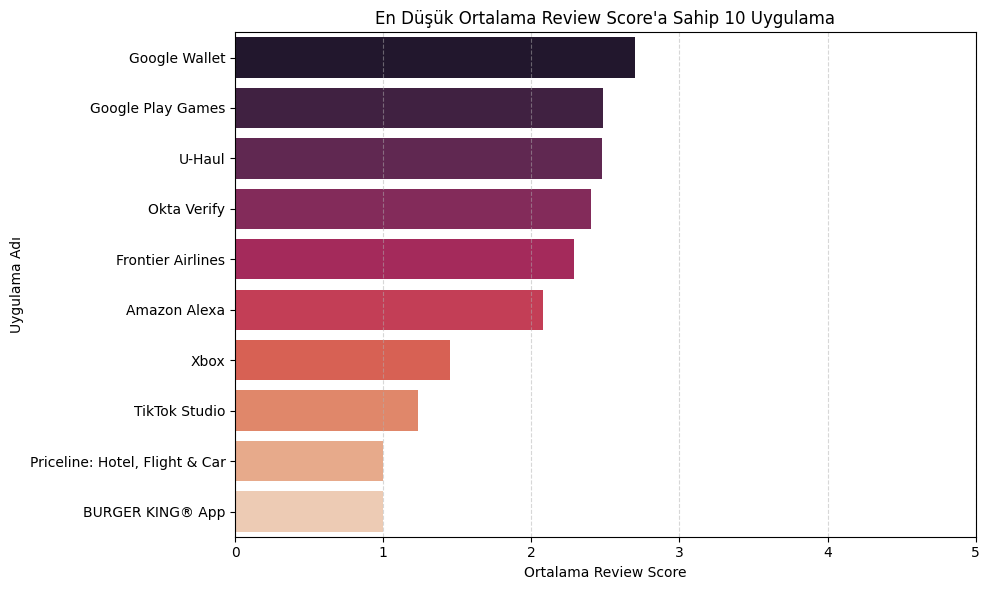

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_apps.values, y=bottom_apps.index, palette='rocket')
plt.title('En Düşük Ortalama Review Score\'a Sahip 10 Uygulama')
plt.xlabel('Ortalama Review Score')
plt.ylabel('Uygulama Adı')
plt.xlim(0, 5)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [19]:
score_helpful_avg = merged_df.groupby('review_score')['helpful_count'].mean().reset_index()

/var/folders/p_/zd0vcjpx57s19zc87rq2xj680000gn/T/ipykernel_2368/2307246019.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=score_helpful_avg, x='review_score', y='helpful_count', palette='magma')


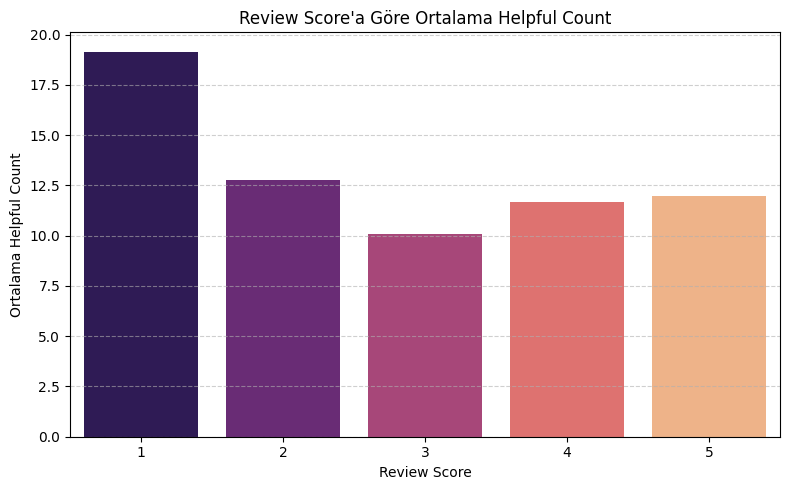

In [20]:
plt.figure(figsize=(8, 5))
sns.barplot(data=score_helpful_avg, x='review_score', y='helpful_count', palette='magma')
plt.title('Review Score\'a Göre Ortalama Helpful Count')
plt.xlabel('Review Score')
plt.ylabel('Ortalama Helpful Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [21]:
merged_df['review_date'] = pd.to_datetime(merged_df['review_date'])

In [22]:
monthly_scores = merged_df.groupby(merged_df['review_date'].dt.to_period('M'))['review_score'].mean().reset_index()
monthly_scores['review_date'] = monthly_scores['review_date'].dt.to_timestamp()


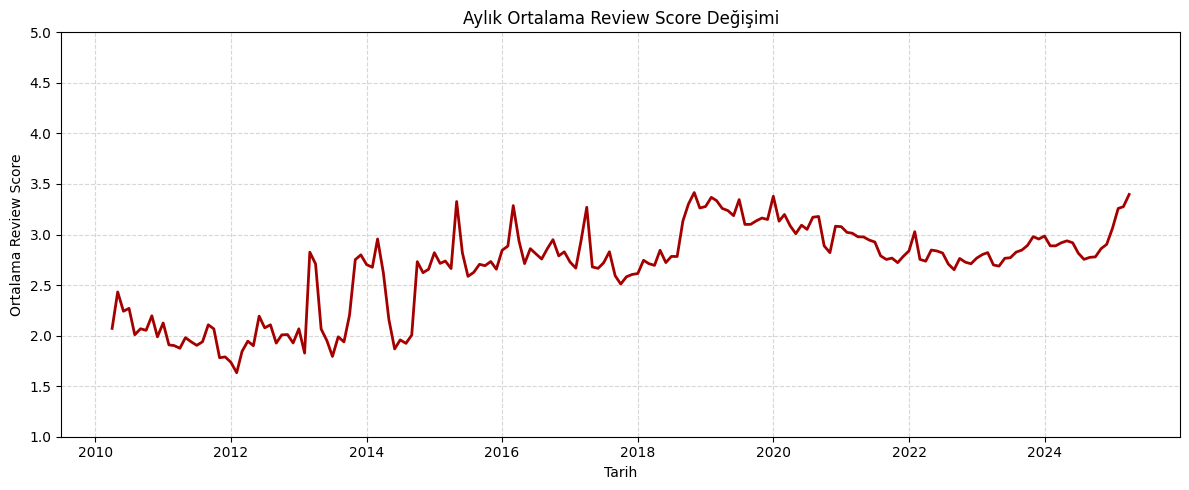

In [24]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_scores, x='review_date', y='review_score', color='#a40000', linewidth=2)
plt.title('Aylık Ortalama Review Score Değişimi')
plt.xlabel('Tarih')
plt.ylabel('Ortalama Review Score')
plt.ylim(1, 5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# WordCloud

In [28]:
text = " ".join(df['review_text'].dropna().astype(str).tolist())
stopwords = set(STOPWORDS)

In [29]:
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      stopwords=stopwords, max_words=100, colormap='viridis').generate(text)


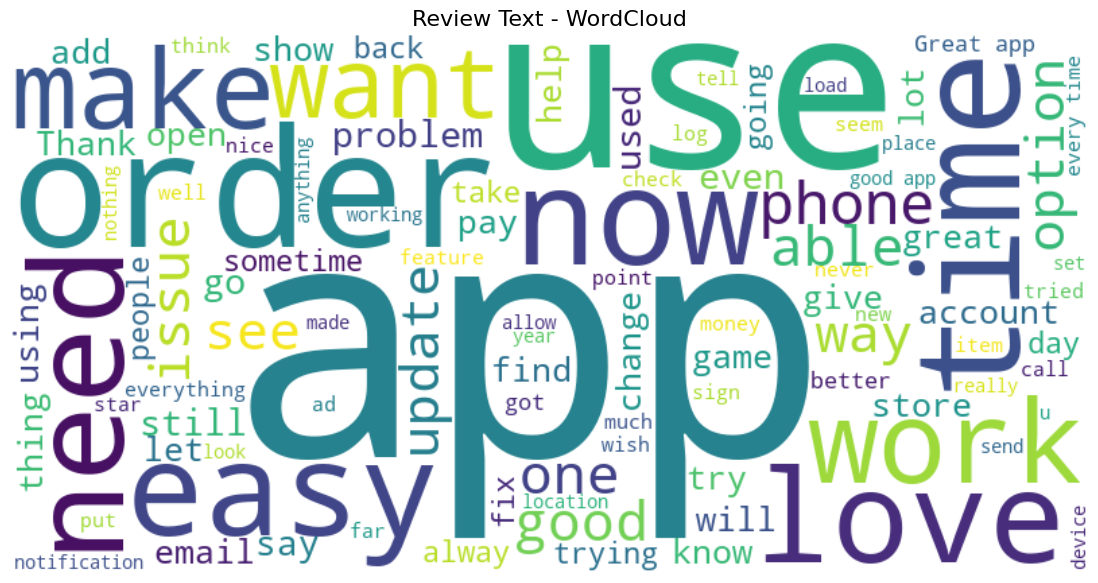

In [30]:
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Review Text - WordCloud", fontsize=16)
plt.show()

In [31]:
text = " ".join(review for review in df['review_text'].astype(str))
stopwords = set(STOPWORDS)


In [32]:
wordcloud = WordCloud(width=1000, height=500, background_color='white',
                      stopwords=stopwords, colormap='inferno').generate(text)

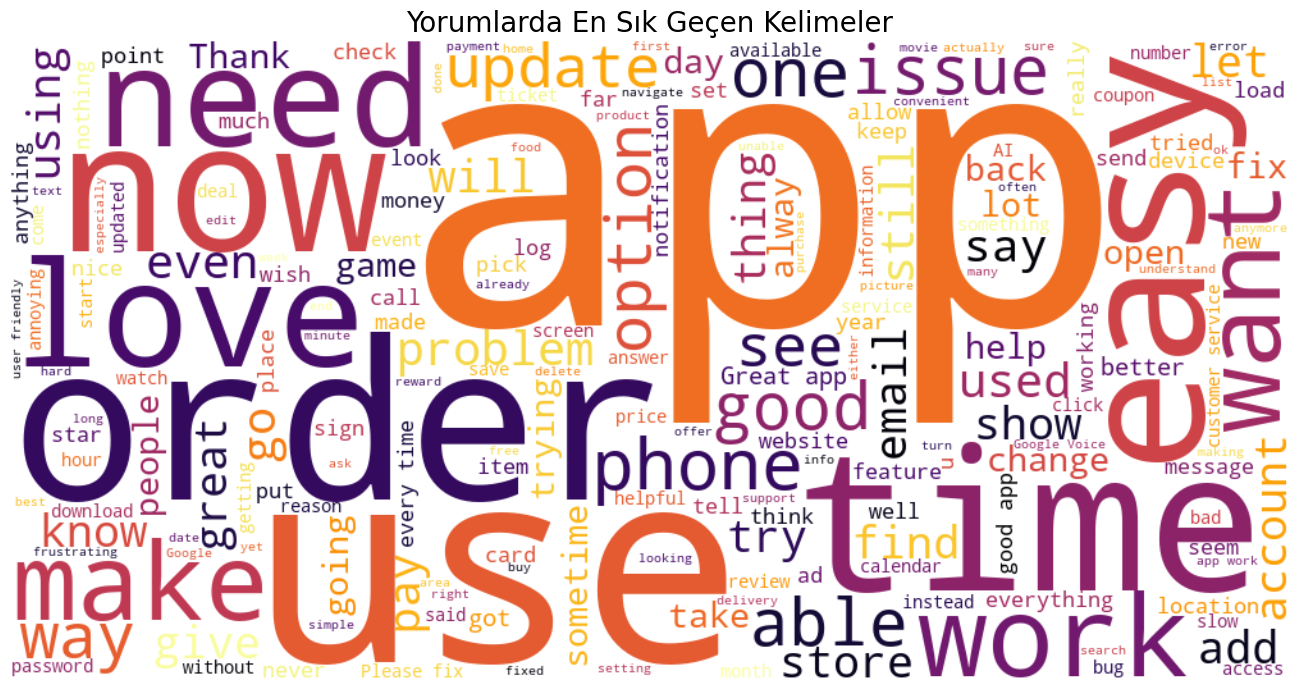

In [33]:
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Yorumlarda En Sık Geçen Kelimeler", fontsize=20)
plt.tight_layout()
plt.show()

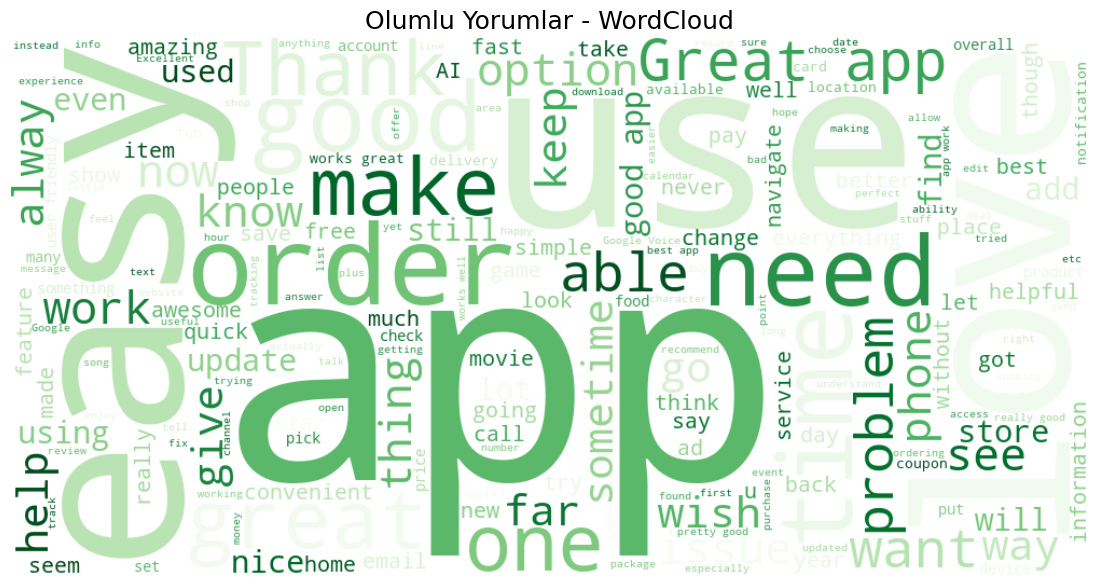

In [34]:
positive_df = df[df['review_score'] >= 4]
text_pos = " ".join(positive_df['review_text'].dropna().astype(str).tolist())

wordcloud_pos = WordCloud(width=1000, height=500, background_color='white',
                          stopwords=stopwords, colormap='Greens').generate(text_pos)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title("Olumlu Yorumlar - WordCloud", fontsize=18)
plt.show()


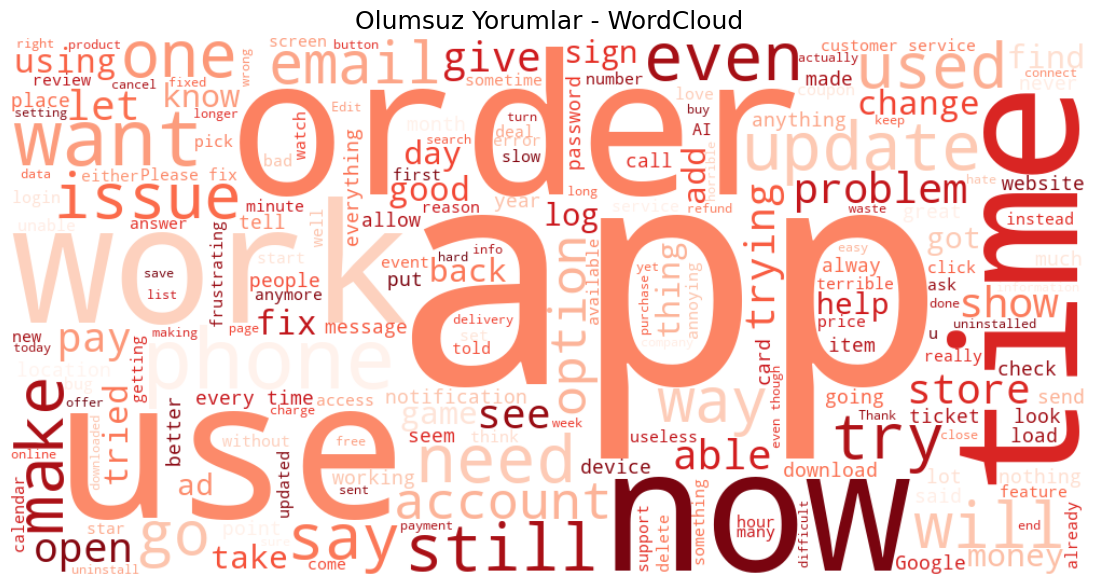

In [35]:
negative_df = df[df['review_score'] <= 2]
text_neg = " ".join(negative_df['review_text'].dropna().astype(str).tolist())

wordcloud_neg = WordCloud(width=1000, height=500, background_color='white',
                          stopwords=stopwords, colormap='Reds').generate(text_neg)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("Olumsuz Yorumlar - WordCloud", fontsize=18)
plt.show()

# Duygu Analizi

In [37]:
%pip install textblob
import nltk
nltk.download('brown')
nltk.download('punkt')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 7.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package brown to /Users/eceus/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /Users/eceus/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [39]:
from textblob import TextBlob

In [40]:
sample_df = df[['review_text', 'review_score']].dropna().sample(10000, random_state=42).copy()

In [41]:
sample_df['polarity'] = sample_df['review_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
sample_df['subjectivity'] = sample_df['review_text'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

In [42]:
def label_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

sample_df['sentiment'] = sample_df['polarity'].apply(label_sentiment)

/var/folders/p_/zd0vcjpx57s19zc87rq2xj680000gn/T/ipykernel_2368/2297277588.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sample_df, x='sentiment', palette=custom_palette, order=['Positive', 'Neutral', 'Negative'])


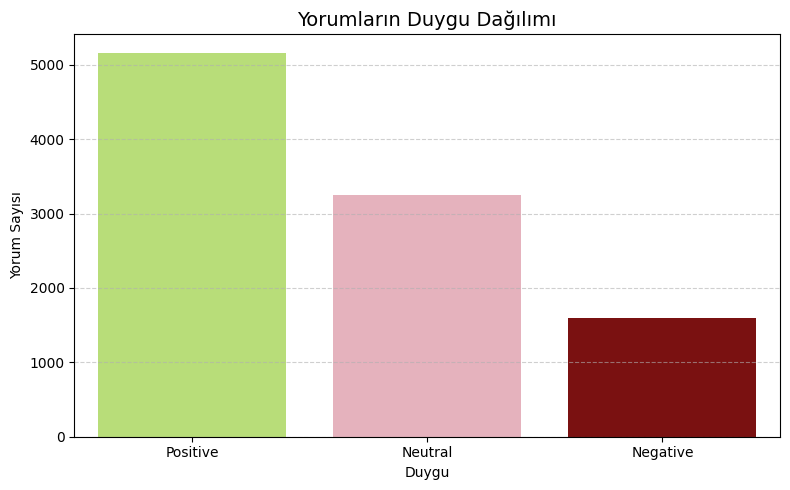

In [48]:
custom_palette = {
    'Positive': '#bcee68',  
    'Neutral': '#eea9b8',   
    'Negative': '#8b0000'  
}

plt.figure(figsize=(8, 5))
sns.countplot(data=sample_df, x='sentiment', palette=custom_palette, order=['Positive', 'Neutral', 'Negative'])
plt.title("Yorumların Duygu Dağılımı", fontsize=14)
plt.xlabel("Duygu")
plt.ylabel("Yorum Sayısı")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [49]:
app_names = apps_df[['app_id', 'app_name']].drop_duplicates()
sample_with_app = df[['app_id', 'review_text']].join(sample_df.set_index('review_text'), on='review_text')
sample_with_app = sample_with_app.merge(app_names, on='app_id', how='left')

In [50]:
app_sentiment_avg = sample_with_app.groupby('app_name')['polarity'].mean().sort_values(ascending=False)

In [51]:
top_positive_apps = app_sentiment_avg.head(10)
top_negative_apps = app_sentiment_avg.tail(10)


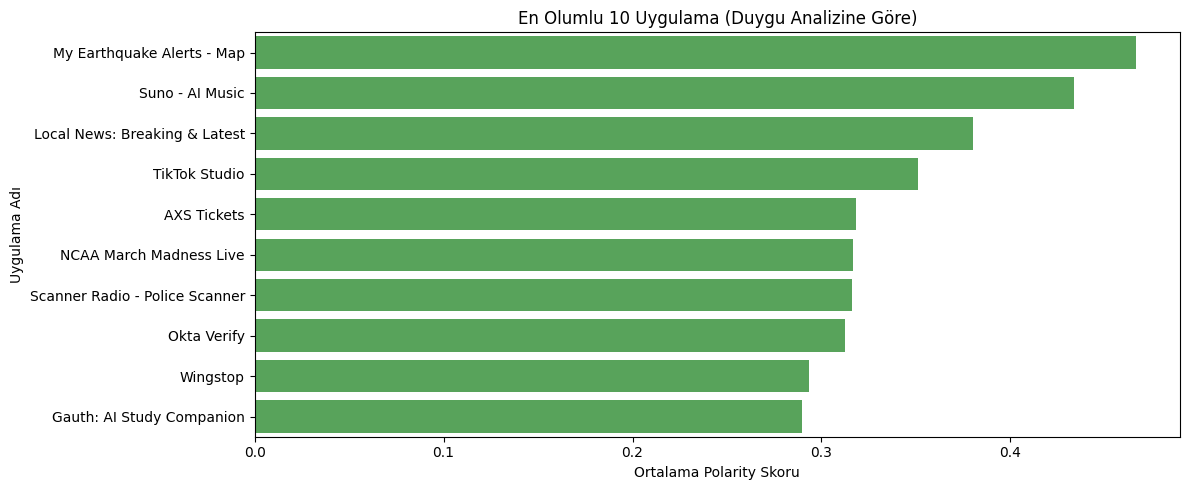

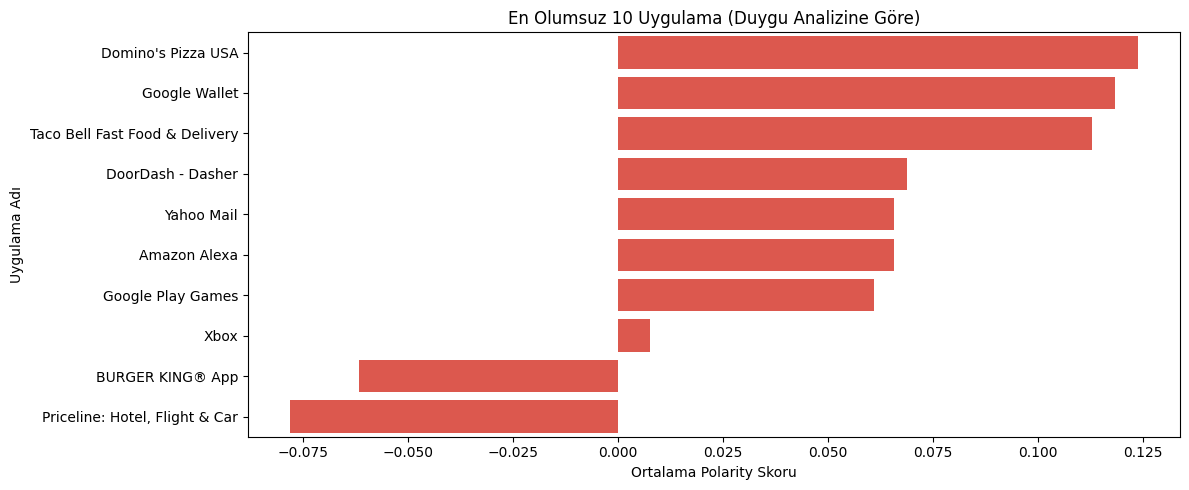

In [52]:
plt.figure(figsize=(12, 5))
sns.barplot(x=top_positive_apps.values, y=top_positive_apps.index, color='#4caf50')
plt.title("En Olumlu 10 Uygulama (Duygu Analizine Göre)")
plt.xlabel("Ortalama Polarity Skoru")
plt.ylabel("Uygulama Adı")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x=top_negative_apps.values, y=top_negative_apps.index, color='#f44336')
plt.title("En Olumsuz 10 Uygulama (Duygu Analizine Göre)")
plt.xlabel("Ortalama Polarity Skoru")
plt.ylabel("Uygulama Adı")
plt.tight_layout()
plt.show()
